## Estadística Aplicada

Sesión 11 - 22 septiembre

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [1]:
##librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
## especializadas
from statsmodels.tsa.seasonal import seasonal_decompose
##configurar tamaño de las graficas
plt.rcParams['figure.figsize'] = (10,6)

In [12]:
##datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month', parse_dates=True)
pasajeros.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
pasajeros = pasajeros.rename(columns={'Thousands of Passengers' : 'miles de pasajeros'})
pasajeros.head(5)

,miles de pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


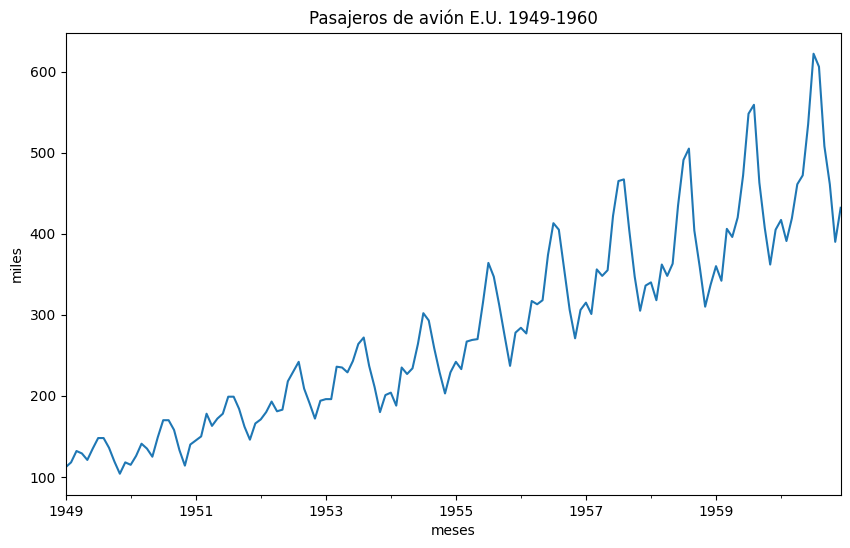

In [21]:
pasajeros['miles de pasajeros'].plot()
plt.title('Pasajeros de avión E.U. 1949-1960')
plt.xlabel('meses')
plt.ylabel('miles');

La serie tiene tendencia creciente, no tiene ciclo, tiene componente estacional cada verano de cada año se incrementa el número de pasajeros.

vamos a obtener los componentes de la serie:
1. Tendencia-ciclo (trend)
2. Estacional (seasonal)
3. Irregular (error)

In [23]:
##
ets1 = seasonal_decompose(pasajeros['miles de pasajeros'], model = 'mult')

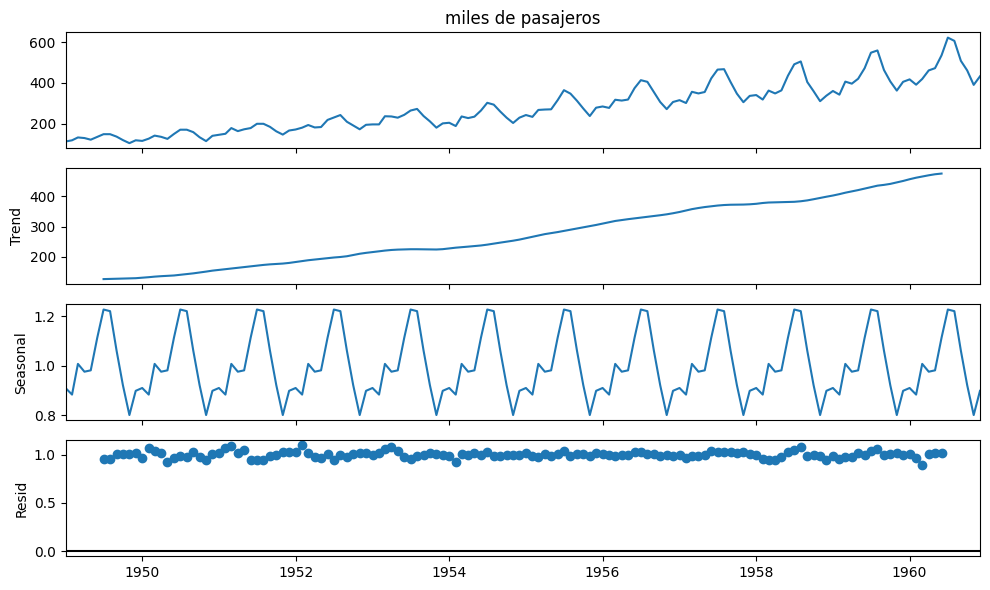

In [26]:
ets1.plot();

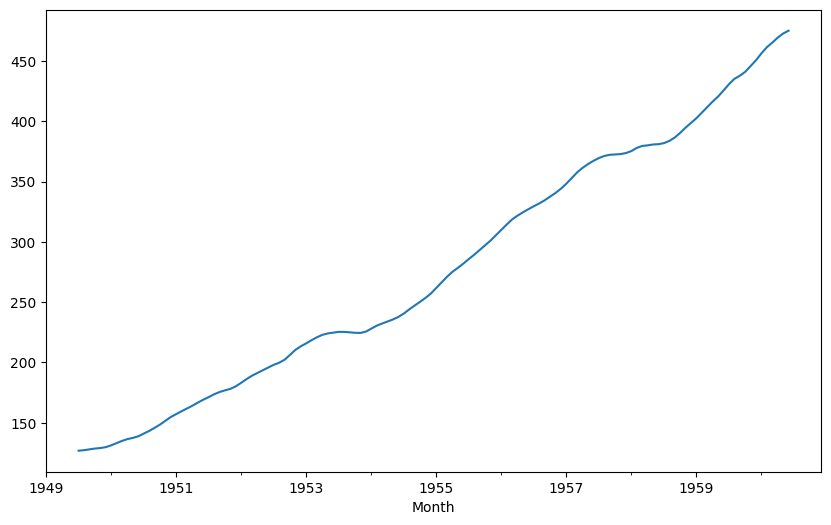

In [28]:
##tendencia ciclo
ets1.trend.plot();

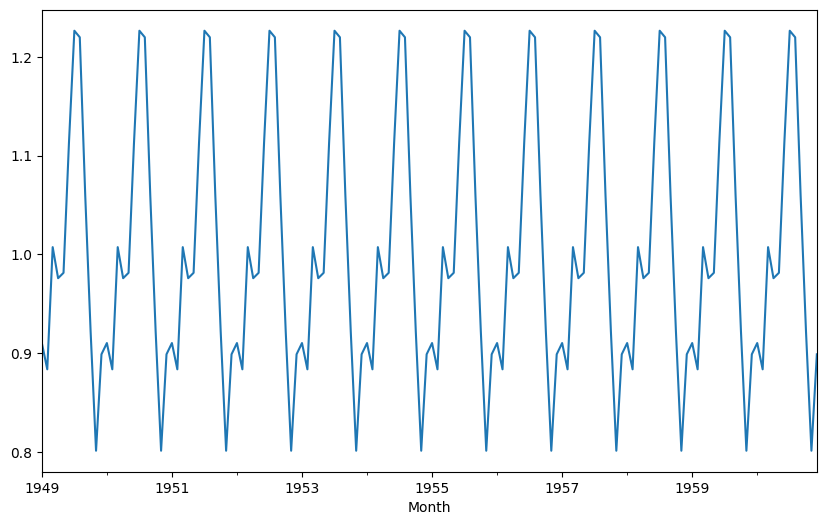

In [29]:
##componente estacional
ets1.seasonal.plot();

<Axes: xlabel='Month'>

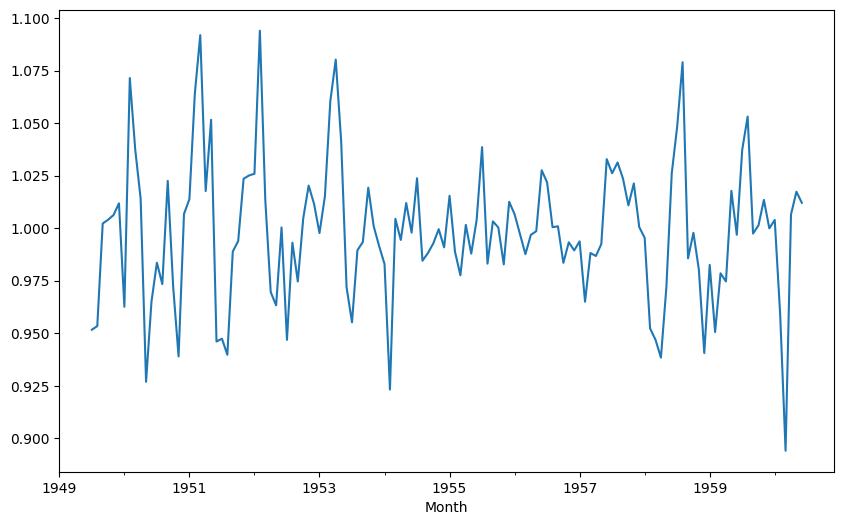

In [30]:
##componente irregular
ets1.resid.plot()

In [31]:
##serie sin tendenca
pasajeros['sin tendencia'] = pasajeros['miles de pasajeros'] / ets1.trend

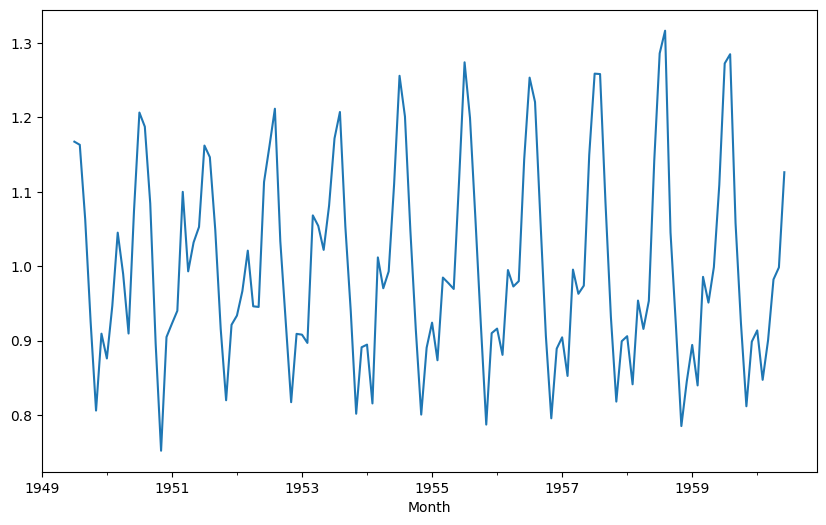

In [33]:
pasajeros['sin tendencia'].plot();

In [35]:
##serie desestacionalizada
pasajeros['desestacionalizada'] = pasajeros['miles de pasajeros'] /ets1.seasonal

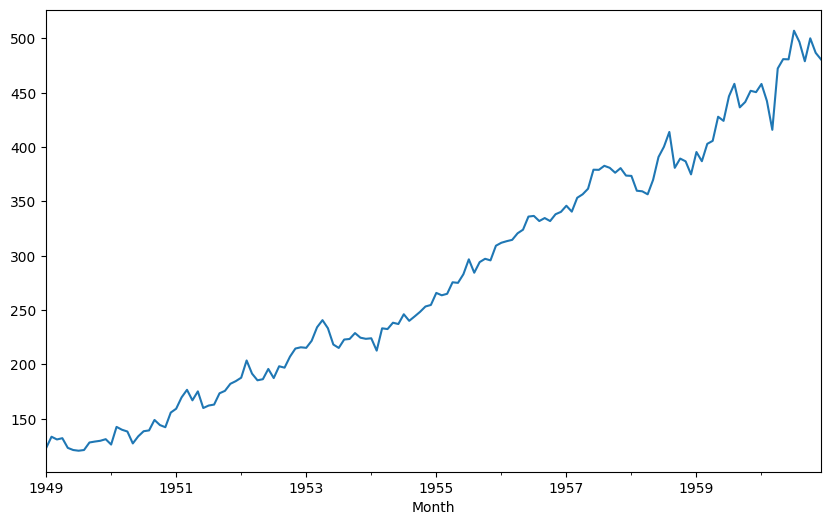

In [37]:
pasajeros['desestacionalizada'].plot();